# Data-Driven Investment Portfolios: Redefining Diversification with K-Means, DBSCAN, and GMM Clustering

### Overview:
In the dynamic realm of modern finance, portfolio construction has evolved beyond conventional paradigms. Diversification remains a guiding principle, but data-driven methodologies have unlocked new dimensions of optimization. This project ventures into the intersection of data science and investment strategy, harnessing the power of K-Means clustering, DBSCAN, and Gaussian Mixture Models (GMM) to engineer portfolios that harmonize risk and return. By distilling insights from annual returns and volatility, we uncover the symphony of patterns hidden within stock market data.

### Introduction:
With a data-rich canvas spanning five years of S&P 500 stocks, this project emerges at the crossroads of data science and financial strategy. The mission is twofold: to harness the power of computational methods in data analysis and to redefine portfolio construction through innovative clustering techniques. By delving into the dynamics of annual returns and volatility, this project aspires to create investment portfolios that transcend market uncertainties and empower investors with a deeper understanding of their holdings.

To accomplish this mission, we embark on an exploratory journey that encompasses data preprocessing, outlier detection, dimensionality reduction, and three distinct clustering techniques: K-Means, DBSCAN, and Gaussian Mixture Models (GMM). Through each step, we decipher the optimal number of clusters, identify underlying patterns in stock data, and assemble portfolios that encapsulate a diversified selection of stocks.

This project exemplifies the convergence of theory and application, as we bridge the gap between theoretical concepts and practical portfolio management. By leveraging Python and a spectrum of machine learning libraries, we infuse mathematical rigor into the art of investment, enabling investors to construct portfolios that reflect their risk appetite and financial goals.

### Methodologies
Data Collection and Preprocessing:

    The project commences with the acquisition of a comprehensive dataset containing historical stock data of S&P 500 companies over a five-year period. This raw dataset is loaded and organized, ready for exploration and analysis. The initial preprocessing step involves grouping the data by stock 'Name' and calculating the annual returns and volatilities for each stock. These calculated metrics serve as the foundation for subsequent analysis, offering insights into the performance and risk profiles of individual stocks.

Outlier Detection and Data Visualization:

    To ensure the integrity of the dataset, a critical step is the identification and handling of outliers. The Z-score method is employed to detect outliers within the annual returns and volatility data. Outliers are marked and visualized on scatter plots, offering a tangible view of their impact on the dataset.

Data Standardization:

    Given the utilization of distance-based clustering algorithms like K-Means, DBSCAN, and GMM, data standardization emerges as a crucial step. StandardScaler is applied to ensure that all features contribute equally to the clustering process, preventing undue dominance by features with larger scales. This standardized data becomes the foundation for meaningful distance calculations, improving the accuracy of cluster assignments.

K-Means Clustering:

    K-Means, a centroid-based clustering algorithm, is employed to partition the standardized data into clusters. The Elbow Method and Silhouette Method are harnessed to determine the optimal number of clusters. The Elbow Method helps identify the 'elbow' point where the rate of decrease in within-cluster sum of squares levels off, indicating an optimal cluster count. The Silhouette Method quantifies cluster quality by measuring the similarity of data points within clusters compared to neighboring clusters, aiding in selecting a suitable number of clusters.

DBSCAN Clustering:

    DBSCAN, a density-based clustering algorithm, complements K-Means by detecting clusters of varying shapes and densities. By iteratively assessing data points' neighborhoods, DBSCAN assigns points to clusters based on their density. Hyperparameter tuning involves exploring various combinations of epsilon (the maximum distance between points in a neighborhood) and minimum samples (the minimum number of points required to form a dense region), culminating in the identification of optimal hyperparameters that yield meaningful clusters.

Gaussian Mixture Models (GMM):

    GMM, a probabilistic model, offers a different perspective on clustering. It assumes that data points are generated from a mixture of several Gaussian distributions. Model selection involves evaluating different covariance types (full, tied, diagonal, spherical) and determining the number of components (clusters) that best explain the data. The Bayesian Information Criterion (BIC) guides the model's complexity, favoring a balance between fit and parsimony.

Portfolio Construction:

    The pinnacle of the project lies in the creation of investment portfolios using the insights from the clustering models. For each model – K-Means, DBSCAN, and GMM – a tailored portfolio construction approach is implemented. By selecting representative stocks from each cluster, a diversified portfolio is assembled. These portfolios encapsulate the essence of each clustering model, offering investors novel avenues for constructing balanced portfolios tailored to their risk tolerance and financial objectives


Why these algorithms:


K-Means Clustering: 

K-Means offers simplicity and speed, making it well-suited for initial insights. Its reliance on centroids, however, can lead to sensitivity to initializations and the assumption of equal-sized, spherical clusters, potentially missing more complex cluster structures.
DBSCAN: 

DBSCAN excels at identifying clusters of varying shapes and sizes, making it robust to noisy data and capable of detecting outliers. Yet, it requires careful selection of hyperparameters, and its performance can degrade with high-dimensional data.
Gaussian Mixture Models (GMM): 

GMM accommodates flexibility in cluster shape and size and provides probabilistic assignment, allowing for soft clustering. However, it's sensitive to initialization and can be computationally expensive for large datasets, with the possibility of converging to local optima.


By juxtaposing these algorithms, we've unlocked a spectrum of clustering techniques, each with unique strengths that collectively contribute to a more comprehensive understanding of investment dynamics. As the landscape of finance continues to evolve, this project stands as a testament to the pivotal role that data-driven insights play in reshaping traditional paradigms.


### Results:

The culmination of this project has yielded insightful results that demonstrate the efficacy of employing K-Means, DBSCAN, and GMM clustering techniques in the realm of portfolio construction. Through rigorous data exploration and analysis, each algorithm's strengths and contributions have been highlighted, offering distinct perspectives on structuring investment portfolios.

K-Means Clustering: After applying the Elbow Method and Silhouette Method, it was determined that an optimal number of clusters lay between 5 and 6. K-Means successfully categorized stocks into coherent groups based on annual returns and volatility. The resulting clusters showcased varying levels of risk and potential returns, providing a foundational basis for constructing diversified portfolios.

DBSCAN Clustering: The DBSCAN algorithm, leveraging density-based insights, identified clusters of varying shapes and sizes. By selecting optimal hyperparameters through iterative experimentation, meaningful clusters were formed. The dynamic nature of DBSCAN enabled the discovery of both densely packed clusters and potential outliers, further enriching portfolio selection strategies.

Gaussian Mixture Models (GMM): Through GMM, we observed the emergence of probabilistic clusters, unveiling the intricate underlying structures of the stock dataset. Model selection using the Bayesian Information Criterion led to the identification of an optimal number of components and covariance types. GMM's flexibility offered a nuanced understanding of cluster shapes, adding a layer of sophistication to portfolio construction.

In culmination, each algorithm generated clusters that, when translated into investment portfolios, showcased diversified stock selections aligned with varying risk appetites. The incorporation of data-driven insights into portfolio management underscores the potential for these methodologies to revolutionize traditional investment practices, empowering investors with deeper knowledge and informed choices. This project stands as a testament to the transformative power of data science in reshaping the landscape of financial decision-making.


In [2]:
#Importing all needed Libraries
import numpy as np
import pandas as pd
import random
import math
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import zscore

In [3]:
# Load the raw data from CSV
raw_data = pd.read_csv(r"C:\Users\Ethan Scott\Downloads\Personal Project\Data-Portfolio\Python\Stock Clustering\all_stocks_5yr.csv")

# Group the data by 'Name'
grouped_data = raw_data.groupby('Name')

# Initialize lists to store calculated values
stock_names = []
returns = []
volatilities = []

# Calculate annual returns and volatility for each stock
for name, group in grouped_data:
    stock_names.append(name)
    # Calculate daily percentage changes
    daily_returns = group['close'].pct_change()
    # Calculate annualized return and volatility
    annual_return = daily_returns.mean() * 252
    annual_volatility = daily_returns.std() * math.sqrt(252)
    returns.append(annual_return)
    volatilities.append(annual_volatility)

# Create a DataFrame with the calculated values
stocks = pd.DataFrame({
    'Name': stock_names,
    'Return': returns,
    'Volatility': volatilities
})

# Remove duplicates based on the 'Name' column
stocks.drop_duplicates(subset=['Name'], keep='first', inplace=True)

# Display the DataFrame
print(stocks.head())

   Name    Return  Volatility
0     A  0.114232    0.245766
1   AAL  0.313831    0.356484
2   AAP  0.111748    0.300951
3  AAPL  0.198122    0.231657
4  ABBV  0.264656    0.267586


## Checking for Outliers using the Z-score Method

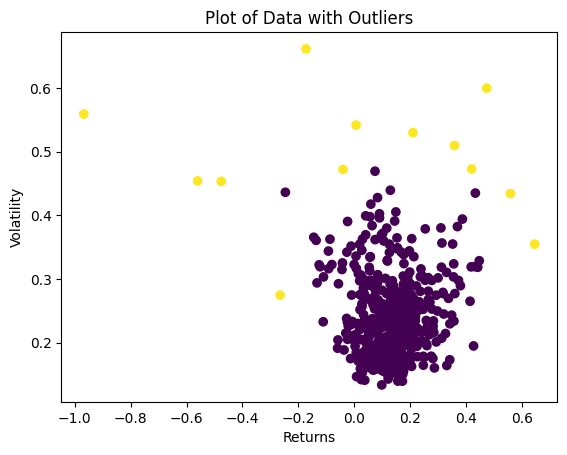

In [213]:
z_scores = np.abs(zscore(stocks[['Return', 'Volatility']]))
outliers = (z_scores > 3).any(axis=1)  # Define threshold for outliers

# Mark outliers in the plot
plt.scatter(stocks['Return'], stocks['Volatility'], c=outliers)

plt.title("Plot of Data with Outliers")
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.show()

In [214]:
# Removing Outliers
stocks = stocks[~outliers]
stocks

,Name,Return,Volatility
0,A,0.114232,0.245766
1,AAL,0.313831,0.356484
2,AAP,0.111748,0.300951
3,AAPL,0.198122,0.231657
4,ABBV,0.264656,0.267586
...,...,...,...
500,XYL,0.218813,0.217307
501,YUM,0.078037,0.262071
502,ZBH,0.114916,0.207924
503,ZION,0.195198,0.259674


## Standardizing Data

Why I did this:

K-Means and DBSCAN:

    These algorithms calculate distances between data points to assign them to clusters. If your features are on different scales, it can lead to clustering results being biased towards features with larger scales. Standardizing your data using StandardScaler ensures that the distance calculations are meaningful and that no feature dominates the clustering process.

Gaussian Mixture Models (GMM):
 
    This is a probabilistic model that also involves estimating distances and covariances between data points. Similar to K-Means and DBSCAN, GMM can benefit from standardized data, as it helps achieve a better estimate of the Gaussian components' parameters.

In [215]:
X = stocks[['Return', 'Volatility']].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

## K-Means Clustering 
### Using the Elbow Method to Determine the Number of Clusters

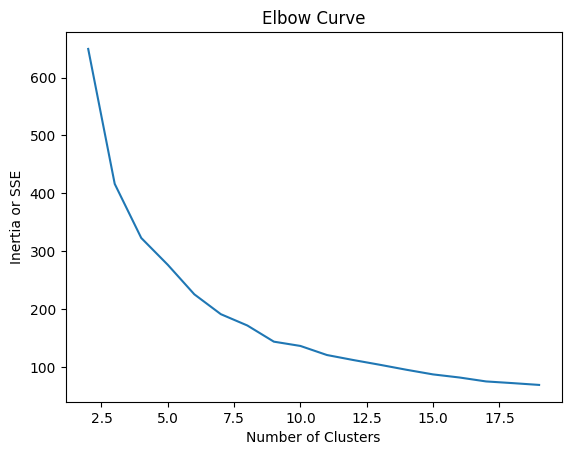

In [216]:
#Intertia is the Sum of Squared Error
inertia = []
for k in range(2,20):
    kmeans=KMeans(n_clusters=k, n_init = 'auto', random_state=100)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

#plotting Data

plt.plot(range(2,20),inertia)
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia or SSE")
plt.show()

It is a bit hard to tell exactly what the best number of clusters is, it looks like it might be somewhere between 5 and 6.

### Using the Silhouette Method to Determine the Number of Clusters

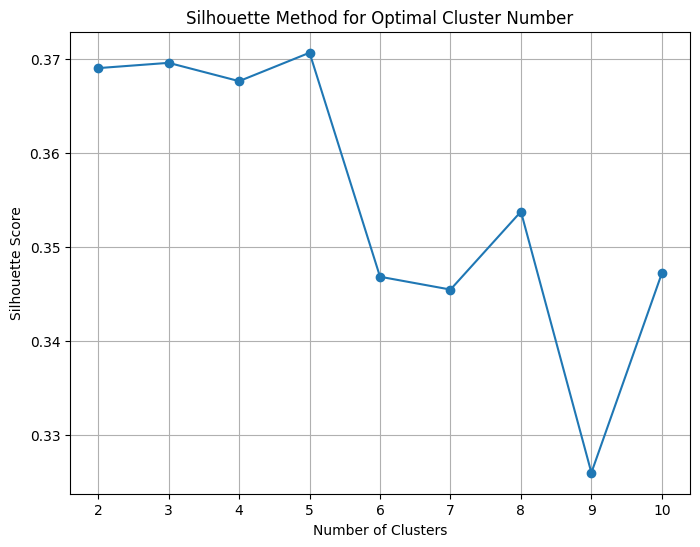

In [217]:
# Find the optimal number of clusters using the Silhouette Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init="auto", random_state=100)
    cluster_labels = kmeans.fit_predict(stocks[['Return', 'Volatility']])
    silhouette_avg = silhouette_score(stocks[['Return', 'Volatility']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette scores for different cluster numbers
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title("Silhouette Method for Optimal Cluster Number")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

Here we can see that the optimal number of clusters is 5.

### Creating K-Means Model

In [218]:
#Creating the model and labeling each stock into it's cluster
kmeans = KMeans(n_clusters=5).fit(X)
clusters = kmeans.labels_
stocks['KNN_Clusters'] = clusters
stocks.head

c:\Users\Ethan Scott\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<bound method NDFrame.head of      Name    Return  Volatility  KNN_Clusters
0       A  0.114232    0.245766             1
1     AAL  0.313831    0.356484             3
2     AAP  0.111748    0.300951             1
3    AAPL  0.198122    0.231657             0
4    ABBV  0.264656    0.267586             3
..    ...       ...         ...           ...
500   XYL  0.218813    0.217307             0
501   YUM  0.078037    0.262071             1
502   ZBH  0.114916    0.207924             2
503  ZION  0.195198    0.259674             0
504   ZTS  0.186295    0.224500             0

[492 rows x 4 columns]>

Text(0, 0.5, 'Volatility')

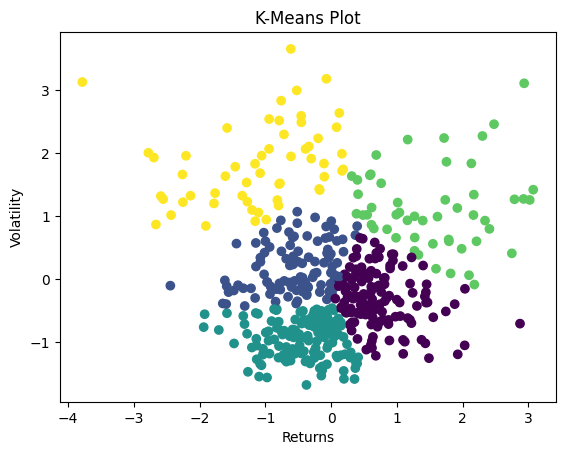

In [219]:
# Plotting the clusters
plt.scatter(X[:,0],X[:,1], c=clusters)
plt.title("K-Means Plot")
plt.xlabel("Returns")
plt.ylabel("Volatility")

## DBSCAN Modelling

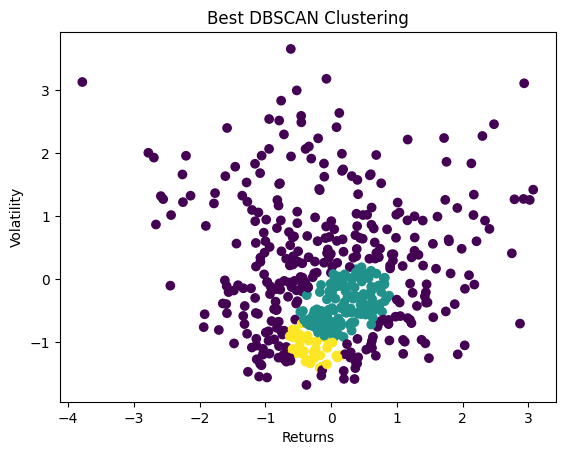

Best DBSCAN Hyperparameters:
Best eps: 0.4379310344827586
Best min_samples: 70
Best number of clusters: 2


In [220]:
# Create DBSCAN model
dbscan = DBSCAN()

# Define a range of possible values for eps and min_samples
eps_values = np.linspace(0.1, 5.0, num=30)
min_samples_values = range(25, 100)

best_dbscan = None
best_num_clusters = 0
best_num_noise = len(X)

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X)
        
        num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
        num_noise = list(dbscan_labels).count(-1)
        
        if num_clusters > best_num_clusters or (num_clusters == best_num_clusters and num_noise < best_num_noise):
            best_num_clusters = num_clusters
            best_num_noise = num_noise
            best_dbscan = dbscan

best_dbscan_labels = best_dbscan.labels_

# Add best DBSCAN cluster labels to stocks DataFrame
stocks['DBSCAN_Clusters'] = best_dbscan_labels

# Visualize best DBSCAN clusters
plt.scatter(X[:,0], X[:,1], c=best_dbscan_labels, cmap='viridis')
plt.title("Best DBSCAN Clustering")
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.show()

# Display best DBSCAN hyperparameters
print("Best DBSCAN Hyperparameters:")
print(f"Best eps: {best_dbscan.eps}")
print(f"Best min_samples: {best_dbscan.min_samples}")

stocks['DBSCAN_Clusters']

# Display best number of clusters
print("Best number of clusters:", best_num_clusters)


## Gausian Mixture Model (GMM)

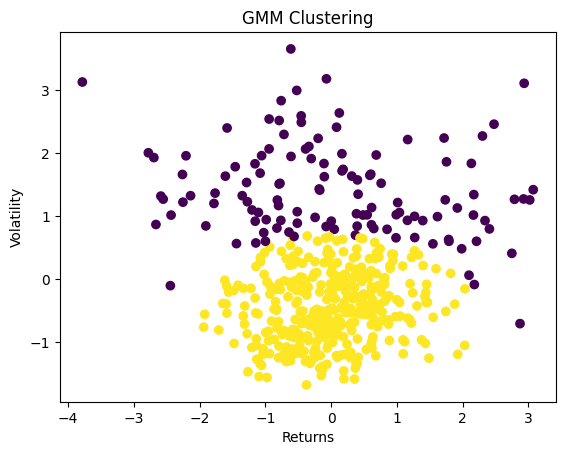

Best GMM Hyperparameters:
Best number of components: 2
Best covariance type: diag


0      1
1      0
2      0
3      1
4      1
      ..
500    1
501    1
502    1
503    1
504    1
Name: GMM_Clusters, Length: 492, dtype: int64

In [221]:
# Create GMM model
gmm = GaussianMixture(random_state=100)


# Define possible values for the number of components (clusters)
n_components_range = range(1, 10)

# Define possible covariance types
covariance_types = ['full', 'tied', 'diag', 'spherical']

best_gmm = None
best_bic = np.inf

for n_components in n_components_range:
    for covariance_type in covariance_types:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=100)
        gmm.fit(X)
        
        bic = gmm.bic(X)  # Calculate Bayesian Information Criterion
        
        if bic < best_bic:
            best_bic = bic
            best_gmm = gmm

best_gmm_labels = best_gmm.predict(X)

# Add best GMM cluster labels to stocks DataFrame
stocks['GMM_Clusters'] = best_gmm_labels

# Visualize best GMM clusters
plt.scatter(X[:,0], X[:,1], c=best_gmm_labels, cmap='viridis')
plt.title("GMM Clustering")
plt.xlabel("Returns")
plt.ylabel("Volatility")
plt.show()

# Display best GMM hyperparameters
print("Best GMM Hyperparameters:")
print(f"Best number of components: {best_gmm.n_components}")
print(f"Best covariance type: {best_gmm.covariance_type}")

stocks["GMM_Clusters"]

### Creating a Porftolio Using each Model

In [222]:
portfolio_KNN()
portfolio_DBSCAN()
portfolio_GMM()

Selected Portfolio:
     Name    Return  Volatility  KNN_Clusters  DBSCAN_Clusters  GMM_Clusters
503  ZION  0.195198    0.259674             0               -1             1
501   YUM  0.078037    0.262071             1               -1             1
62    BBT  0.131483    0.193124             2                0             1
290  LRCX  0.317630    0.277097             3               -1             0
274  KORS  0.097133    0.369313             4               -1             0
Selected Portfolio:
    Name    Return  Volatility  KNN_Clusters  DBSCAN_Clusters  GMM_Clusters
106  CMI  0.100729    0.231303             1               -1             1
410  SEE  0.197864    0.247626             0                0             1
15   AEP  0.087883    0.167141             2                1             1
Selected Portfolio:
     Name    Return  Volatility  KNN_Clusters  DBSCAN_Clusters  GMM_Clusters
26   ALGN  0.447289    0.328640             3               -1             0
302  MCHP  0.193982 

In [223]:

# Define the portfolio function
def portfolio_KNN():
    # Count the number of stocks in each cluster
    cluster_counts = stocks['KNN_Clusters'].value_counts().sort_index()

    # Initialize a list to store selected stocks
    selected_stocks = []

    # Iterate through each cluster and randomly select exactly one stock
    for cluster in cluster_counts.index:
        # Select stocks from the cluster
        stocks_from_cluster = stocks[stocks['KNN_Clusters'] == cluster]

        # Shuffle the stocks within the cluster
        shuffled_stocks = stocks_from_cluster.sample()

        # Select the first stock from the shuffled list
        selected_stocks_from_cluster = shuffled_stocks.head(1)

        selected_stocks.append(selected_stocks_from_cluster)

    # Concatenate the list of selected stocks DataFrames
    selected_stocks_df = pd.concat(selected_stocks)
    
    # Display the selected portfolio
    print("Selected Portfolio:")
    print(selected_stocks_df)


In [224]:
# Define the portfolio function
def portfolio_DBSCAN():
    # Count the number of stocks in each cluster
    cluster_counts = stocks['DBSCAN_Clusters'].value_counts().sort_index()

    # Initialize a list to store selected stocks
    selected_stocks = []

    # Iterate through each cluster and randomly select exactly one stock
    for cluster in cluster_counts.index:
        # Select stocks from the cluster
        stocks_from_cluster = stocks[stocks['DBSCAN_Clusters'] == cluster]

        # Shuffle the stocks within the cluster
        shuffled_stocks = stocks_from_cluster.sample()

        # Select the first stock from the shuffled list
        selected_stocks_from_cluster = shuffled_stocks.head(1)

        selected_stocks.append(selected_stocks_from_cluster)

    # Concatenate the list of selected stocks DataFrames
    selected_stocks_df = pd.concat(selected_stocks)
    
    # Display the selected portfolio
    print("Selected Portfolio:")
    print(selected_stocks_df)

In [225]:
# Define the portfolio function
def portfolio_GMM():
    # Count the number of stocks in each cluster
    cluster_counts = stocks['GMM_Clusters'].value_counts().sort_index()

    # Initialize a list to store selected stocks
    selected_stocks = []

    # Iterate through each cluster and randomly select exactly one stock
    for cluster in cluster_counts.index:
        # Select stocks from the cluster
        stocks_from_cluster = stocks[stocks['GMM_Clusters'] == cluster]

        # Shuffle the stocks within the cluster
        shuffled_stocks = stocks_from_cluster.sample()

        # Select the first stock from the shuffled list
        selected_stocks_from_cluster = shuffled_stocks.head(1)

        selected_stocks.append(selected_stocks_from_cluster)

    # Concatenate the list of selected stocks DataFrames
    selected_stocks_df = pd.concat(selected_stocks)
    
    # Display the selected portfolio
    print("Selected Portfolio:")
    print(selected_stocks_df)